# General Feedback from Last Year

* The code was supposed to work for any choice of network, and `.mat` files, not only for the `water4720.mat` and `water6.mat`, no numbers like 4720 in the code, you must find sizes automatically.

* You were supposed to use the `while` loop you got.

* As you work with the same matrix all the time in the `while` loop, you just do Gaussian elimination of the matrices before the loop, and apply the elimination to the right-hand-sides.

* In 2 (and 3) you need to automatically construct a right-hand-side $b$ every time in the loop

* The following two loops are exactly the same with the same number of operations
1. 
``` Fortran
    while isempty(loop)
        ...
        p=a\b;
        ...
    end
``` 
2. 
``` Fortran
    while isempty(loop)
        ...
        [L,U,P] = lu(A);
        d = L\(P*b);
        x = U\d;
        ...
    end
```  

* Never repeat the same code – it should probably be in a loop
* Indent you code
* Name on you report!

In [1]:
import scipy.io
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import scipy.sparse.linalg
import numpy as np
from scipy.sparse import csc_matrix

data = scipy.io.loadmat('water4720.mat')
A = data['A']
sources = data['sources']
n = A.shape[0]
b = np.zeros((n,1))
b[sources] = 100

In [2]:
# LU and sparse LU
[P, L, U] = scipy.linalg.lu(A)
spLU = scipy.sparse.linalg.splu(A)

/home/chenggong/anaconda3/envs/fenicsproject/lib/python3.6/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:296: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


## Sparse Pattern

Text(0.5,33,'nnz(U)=448616')

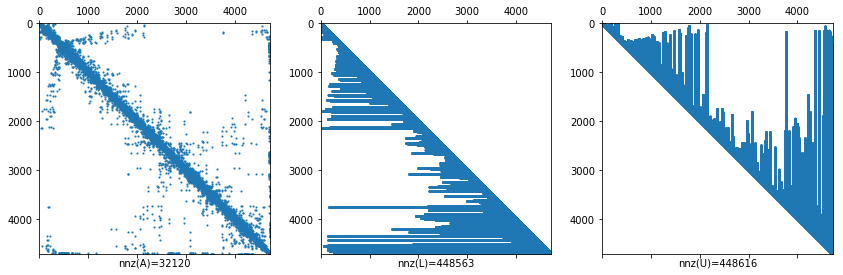

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
fig.tight_layout(pad=2, w_pad=2, h_pad=0)
axs[0].spy(A, markersize=1)
axs[0].set_xlabel('nnz(A)='+str(np.count_nonzero(A)))

axs[1].spy(L, markersize=1)
axs[1].set_xlabel('nnz(L)='+str(np.count_nonzero(L)))

axs[2].spy(U, markersize=1)
axs[2].set_xlabel('nnz(U)='+str(np.count_nonzero(U)))

Text(0.5,33,'nnz(A)=118048')

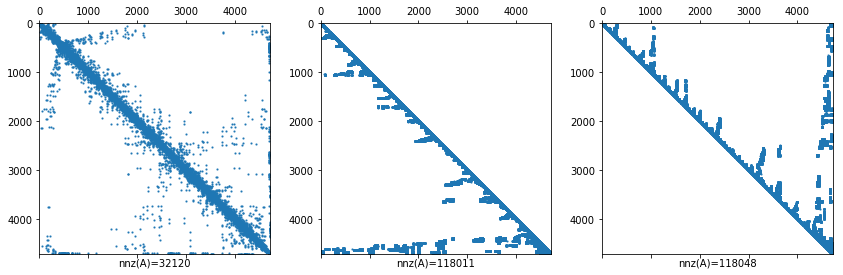

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
fig.tight_layout(pad=2, w_pad=2, h_pad=0)
axs[0].spy(A, markersize=1)
axs[0].set_xlabel('nnz(A)='+str(np.count_nonzero(A)))

axs[1].spy(spLU.L, markersize=1)
axs[1].set_xlabel('nnz(A)='+str(spLU.L.nnz))

axs[2].spy(spLU.U, markersize=1)
axs[2].set_xlabel('nnz(A)='+str(spLU.U.nnz))

## Check solutions

In [ ]:
x_A = scipy.linalg.solve(A,b)
LU = scipy.linalg.lu_factor(A)
x_LU = scipy.linalg.lu_solve(LU, b) 
spLU = scipy.sparse.linalg.splu(A)
x_sp = spLU.solve(b)

/home/chenggong/anaconda3/envs/fenicsproject/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/chenggong/anaconda3/envs/fenicsproject/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


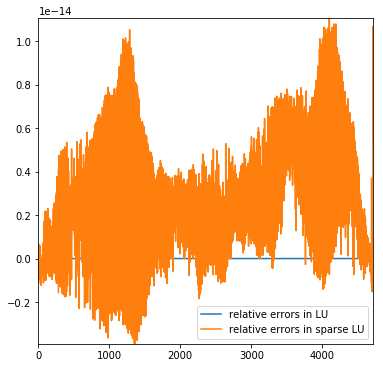

In [27]:
# Plot the relative error solved by LU and sparse LU

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot((x_A-x_LU)/x_A)
ax.plot((x_A -x_sp)/x_A)
ax.autoscale(enable=True, axis='both', tight=True)
ax.legend(['relative errors in LU','relative errors in sparse LU'])

## Execution Time

In [7]:
%%timeit -r 5 -n 1 
x_A = scipy.linalg.solve(A,b)

1.76 s ± 127 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


<TimeitResult : 1.76 s ± 127 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)>

In [8]:
%%timeit -r 5 -n 1  
LU = scipy.linalg.lu_factor(A)
x_LU = scipy.linalg.lu_solve(LU, b) 

1.54 s ± 12 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


<TimeitResult : 1.54 s ± 12 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)>

In [11]:
%%timeit -r 5 -n 1 
spLU = scipy.sparse.linalg.splu(A)
x_sp = spLU.solve(b)

390 ms ± 7.28 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
